# Lab 3: Muon Decay

As cosmic rays bombard Earth, protons within these rays will collide with nuclei within the upper atmosphere. This will produce pions \& antipions which begin to decay into muons and antimuons plus either a neutrino or anti-neutrino. Thus, the muon is a sub-particle by-product of cosmic rays which hit our atmosphere. These muons will decay further into a positron or electron plus another $2$ neutrinos or anti-neutrinos. This process is illustrated below:

\begin{align*}
    \mu^+ \rightarrow e^+ \nu  \bar{\nu}\\
    \mu^- \rightarrow e^- \bar{\nu}  \nu
\end{align*}

where:

- $\mu^-$ designates the muon 

- $\mu^+$ designates the antimoun

- $e^+$ \& $e^-$ are the positron and electron respectively

- $\nu$ is the neutrinos 

- $\bar{\nu}$ is the antineutrino




The scintillator is able to stop muons with a reduced total energy of approximately $160$ $MeV$. This energy is low enough that the moun is capable of stopping within the scintillator and releasing their remaining kinetic energy of order $50$ $MeV$ in the form of a photon. This photon is then sent to the photomultiplier tube which is capable of increasing the photon, or multiplying its energy, to allow for measurements. This creates 2 successive flashes one from arrival and one from decay. However, other sources such as beta and gamma rays or even muons with total energy greater than $160$ $MeV$ will cause unwanted sources of error which can be seen as uncorrelated events that will serve as our background. 

---

## Data Structure

The data from the experiment is structured such that the first column contains the time between the successive flashes in **nanoseconds**. Any value greater than $40,000$ corresponds to a signal exceeding the timing circuit's maximum. Thus for our data, we exclude numbers above $40,000$ which indicate muons that either did not stop or any other false reading. An example is given as $40,005$ represents 5 triggers in a particular second with each time reaching the circuit's "timeout" situation.  

The second column is the readings of the PC clock in UTC beginning at January $1^{st}$, 1970. Since these timestamps were not used for the data analysis they were not read in.

The `for loop` below shows the first column of decay times from each file being read in, and assigned to a consolidated list. After which `np.concatenate()` was used to create a single-column array that would be used during the analysis.

The data was then filtered so that it contained values under $40,000$ which correspond to the muon decay measurements in **nanoseconds**. 

---
</br>
</br>

In [124]:
############
# Packages #
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
####################################
#
#############
# File List #############################
Muon_Data_Files = ['23-10-30-16-26.data',
                   '23-11-01-15-22.data',
                   '23-11-05-13-25.data',
                   '23-11-08-15-55.data',
                   '23-11-13-15-59.data',
                   '23-11-15-15-50.data',
                   '23-11-17-16-43.data',
                   '23-11-20-16-11.data',
                   '23-11-25-14-50.data']
#########################################
# Loop count
number_files = len(Muon_Data_Files)
# Create an empty list for appending
Decay_Times_List = []
# Loop through data files
for ii in range(number_files):
    # Laod Data File
    data = np.loadtxt(Muon_Data_Files[ii], delimiter=' ', dtype=int)
    # Set Decay Time as the first column
    Muon_Decay = data[:,0]
    # Append list with current file
    Decay_Times_List.append(Muon_Decay)
#######################################
# -Use concatenate to create a singel array from list
#
DecayTime_Initial = np.concatenate(Decay_Times_List)
############################################
#
########################################
# Remove values >= 40000 from DecayTime
DecayTime = np.delete(DecayTime_Initial, np.where(DecayTime_Initial >= 30000))
###########
# Convert Decay Time to Microseconds
DecayTime = DecayTime * 0.001

</br>
</br>

## Best-Fit Function

The fitting of the histogram was performed using an equation for exponential decay as seen below:

\begin{align}
    N(t) = B e^{ - \frac{t}{\tau}} + A
\end{align}

where:

- B are correlated events of Muons Decaying

- A are the uncorrelated events

- t is the decay time data

- $\tau$ is the mean lifetime




The uncorrelated events were used as the background within the plot itself. This was done using the best-fit's optimized parameter for $A$.

---

### Error Bars

We will set our error bars to be the standard deviation of the counts extracted from the optimized histogram. 

---
</br>
</br>

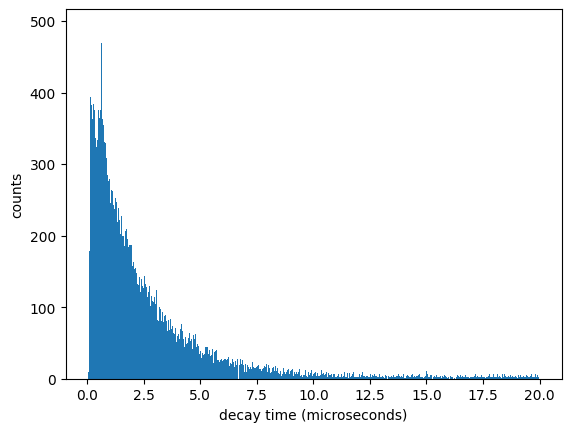

In [125]:
################
# Fit Funciton ############
def Fit_Func(t, tau, B, A):
    return B*np.exp(-(1/tau)*t) + A
##########################################
# X-values used for plotting the best-fit
x = np.linspace(0, 20, 100)
#########################
# Initial Plot & Setup  #
counts, bins, bars = plt.hist(DecayTime, bins=1000)
plt.xlabel('decay time (microseconds)')
plt.ylabel('counts')
plt.show()

</br>
</br>

## Optimization of Bins

Here we plot the histogram for bin sizes 10 to 1000, and use the line:
```verbatim 
Opt_Bin_Size = np.where(errlist[:,1]==np.min(errlist[:,1]))[0][0]
``` 
to set the optimized bin for were the errors are minimized. Thus, we set our optimized bin size to minimize the error in our data. 

</br>

---
</br>
</br>

In [143]:
# Set an empty error list to be filled
errlist = []
######################################
# Iterate through bin sizes 10 to 1000
#
for i in range(10,1000):
#####
    # Plot Histogram for each iteration & get the counts 
    counts, bins = np.histogram(DecayTime, bins=i)
#####
    # Create bin centers for best-fit plotting
    bin_centers = np.array([
        (bins[i] + bins[i + 1])/2
        for i in range(len(bins) - 1)
    ])
#####
    # Set start time to non-optimized value ( >1.5 )
    nstart = np.searchsorted(bin_centers, [1.5,], side='right')[0]
#####
    # Make parameter guess for best-fit
    tau = 2.14
    c1 = counts[0]*1.5
    c2 = 0
    guess = np.array([tau, c1, c2])
#####
    # Create fit using bin centers
    popt, pcov = curve_fit(Fit_Func, bin_centers[nstart:], counts[nstart:], guess)
#####
    # Extract errors form covariance matrix
    perr = np.sqrt(np.diag(pcov))
#####
    # Fill the error list with extracted errors
    errlist.append([i, perr[0]])
##################################
# Set Error list as a Numpy Array
errlist = np.array(errlist)

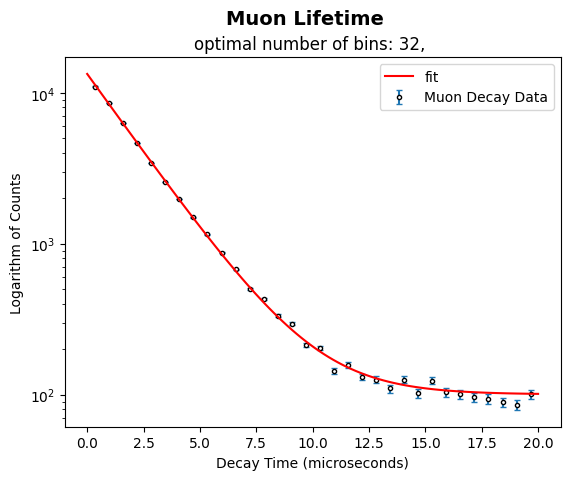

[2.08125834e+00 1.32417363e+04 1.00380287e+02]


In [144]:
################################################
# We set Optimized Bin Size to be number of bins
Opt_Bin_Size = np.where(errlist[:,1]==np.min(errlist[:,1]))[0][0]
nbins = 10+Opt_Bin_Size
########################################
# Plot Histogram with Optimized Bin Size
counts, bins = np.histogram(DecayTime, bins=nbins)
#############################################
# Create Bin Centers with Optimized Bin Size
bin_centers = np.array([
    (bins[i] + bins[i + 1])/2
    for i in range(len(bins) - 1)
])
###############################
#
#####################################
# yerr uses standard deviation      #
#####################################
# set n to be the counts from histogram
n = len(counts)
# Calculate the mean of the counts
mean_counts = np.mean(counts) 
# Calculate the standard deviation of the counts
std_counts = np.sqrt(mean_counts/n)
####################################
#
################################
# Set start time (NOT Optimized)
nstart = np.searchsorted(bin_centers, [1.5,], side='right')[0]
#####
# Make parameter guess for best-fit
tau = 2.14
c1 = counts[0]*1.5
c2 = 0
guess = np.array([tau, c1, c2])
#####
# Create Best-Fit
popt, pcov = curve_fit(Fit_Func, bin_centers[nstart:], counts[nstart:], guess)
#################################################
# Plot data and error bars, instead of using a histogram
plt.errorbar(
    bin_centers, counts,
    yerr=std_counts,
    fmt='.',  
    markerfacecolor='white',
    markeredgecolor='black',
    markeredgewidth=1.0,
    linestyle='', 
    capsize=2, 
    zorder=1,
    label='Muon Decay Data'
)
#####################
# Plot the Best-Fit #
plt.plot(
    x, Fit_Func(x, *popt),
    label='fit',
    color='red'
)
#####################
#
#################
# Plot Settings #
plt.xlabel('Decay Time (microseconds)')
plt.ylabel('Logarithm of Counts')
plt.yscale('log')
plt.legend()
plt.suptitle('Muon Lifetime', fontsize=14, fontweight='bold')
plt.title('optimal number of bins: {}, '.format(nbins))
plt.show()
######################
#
###################################
# Output the optimized parameters #
print(popt) #######################
#############

</br>
</br>

## Optimization of Strart Time 
Here we iterate similarly as above, yet we use the following lines:

```verbatim
tstart = (3/1000)*i
nstart = np.searchsorted(bin_centers, [tstart,], side='right')[0]
```
set the start time to be optimized for minimum error.


---
</br>
</br>

In [145]:
# Set an empty error list to be filled
errlist = []
##################################
# Iterate through bins to find 
#  optimal start time
for i in range(1001):
#####    
    # Plot Histogram for each iteration & get the counts 
    counts, bins = np.histogram(DecayTime, bins=nbins)
#####
    # Create bin centers for best-fit plotting
    bin_centers = np.array([
        (bins[i] + bins[i + 1])/2
        for i in range(len(bins) - 1)
    ])
#####
    # Iterate the start time for optimization
    tstart = (3/1000)*i
    nstart = np.searchsorted(bin_centers, [tstart,], side='right')[0]
#####
    # Make parameter guess for best-fit
    tau = 2.14
    c1 = counts[0]*1.5
    c2 = 0
    guess = np.array([tau, c1, c2])
#####
    # Create fit using bin centers
    popt, pcov = curve_fit(Fit_Func, bin_centers[nstart:], counts[nstart:], guess)
#####
    # Extract errors form covariance matrix
    perr = np.sqrt(np.diag(pcov))
#####
    # Fill the error list with extracted errors
    errlist.append([i, perr[0]])
##################################
# Set Error list as a Numpy Array
errlist = np.array(errlist)

</br>
</br>

## Final Graph

---
</br>
</br>

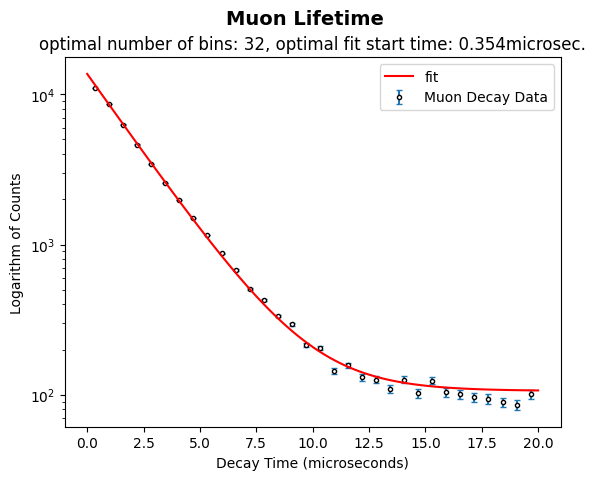

[2.04572114e+00 1.35493809e+04 1.06076224e+02]


In [146]:
################################################
# We set Optimized Bin Size to be number of bins
Opt_Bin_Size = np.where(errlist[:,1]==np.min(errlist[:,1]))[0][0]
##############################################
# Create Optimized Start Time Frim Min. Error
tstart = errlist[Opt_Bin_Size][0]*(3/1000)
########################################
# Plot Histogram with Optimized Bin Size
counts, bins = np.histogram(DecayTime, bins=nbins)
#############################################
# Create Bin Centers with Optimized Bin Size
bin_centers = np.array([
    (bins[i] + bins[i + 1])/2
    for i in range(len(bins) - 1)
])
############################################
#
#####################################
# yerr uses standard deviation      #
#####################################
# set n to be the counts from histogram
n = len(counts)
# Calculate the mean of the counts
mean_counts = np.mean(counts) 
# Calculate the standard deviation of the counts
std_counts = np.sqrt(mean_counts/n)
####################################
#
################################
# Set Optimized Start Time
nstart = np.searchsorted(bin_centers, [tstart,], side='right')[0]
####################################
# Make parameter guess for best-fit
tau = 2.14
c1 = counts[0]*1.5
c2 = 0
guess = np.array([tau, c1, c2])
###################
# Create Best-Fit
popt, pcov = curve_fit(Fit_Func, bin_centers[nstart:], counts[nstart:], guess)
#################################################
# Plot data and error bars, instead of using a histogram
plt.errorbar(
    bin_centers, counts,
    yerr=std_counts,
    fmt='.',  
    markerfacecolor='white',
    markeredgecolor='black',
    markeredgewidth=1.0,
    linestyle='', 
    capsize=2, 
    zorder=1,
    label='Muon Decay Data'
)
#####################
# Plot the Best-Fit #
plt.plot(
    x, Fit_Func(x, *popt),
    label='fit',
    color='red'
)
#####################
#
#################
# Plot Settings #
plt.xlabel('Decay Time (microseconds)')
plt.ylabel('Logarithm of Counts')
plt.yscale('log')
plt.legend()
plt.suptitle('Muon Lifetime', fontsize=14, fontweight='bold')
plt.title(
    'optimal number of bins: {}, '.format(nbins)
    + 'optimal fit start time: {}microsec.'.format(tstart)
)
plt.show()
######################
#
###################################
# Output the optimized parameters #
print(popt) #######################
#############

In [130]:
####################
# DecayTime Output #
####################
# Accepted Value
Muon_Decay_accepted_value = 2.19703
# Accuracy with respect to accepted value
Accuracy_percent = ((Muon_Decay_accepted_value - (popt[0]))/Muon_Decay_accepted_value)*100
# Final Output
Muon_Decay_Output = f"""
{'-'*42}
| The Calculated Muon Lifetime is:
|    {popt[0]:.3f} +/- {perr[0]:.3f} microseconds
|   
{'-'*42}
|  This is accurate by 
|  {Accuracy_percent:.5f} %
|
{'-'*42}
"""
print(Muon_Decay_Output)



------------------------------------------
| The Calculated Muon Lifetime is:
|    2.046 +/- 0.020 microseconds
|   
------------------------------------------
|  This is accurate by 
|  6.88697 %
|
------------------------------------------



</br>


# Conclusion

The accepted value for muon lifetime is $2.19703 \pm 0.00004$ $\mu sec$, and from our experiment, we see a value of  $2.046\pm 0.020$ $\mu sec$. We can conclude that our value was within roughly $- 6.88697$ % of the accepted value. This is with the optimized bin size of $32$ \& the optimized start time of $ 0.354$ $\mu sec$.

As our accepted value is for a vacuum, and our value comes from muons that travel within our atmosphere, we should expect our value to be lower than the accepted. Thus, our value is an excellent representation of muon decay time, and we have successfully calculated the average lifetime of muon decay.

## Other Sources of Error & Why Our Value is Lower Then the Expected Value

We know of many other sources of error such as gamma rays and beta rays from the background radiation of Earth, yet these should be filtered out by the discriminator when set properly. As our discriminator was already set up from the previous experimenters and verified that it was correct we took the assumption that this would not be a source of error. 

Yet, many of the muons that enter the scintillator have a variety of different kinetic energies that cause a variety of decay times. This can come from the muon itself being interrupted by other nuclei in the atmosphere, slowing it down to below the ideal $160$ $MeV$. We also don't know at what angle these muons enter the scintillator at, if at an angle this could also have undesired effects on the kinetic energy, and thus it would emit a photon at a significantly lower energy and yield a lower reading. 

We also did not factor in the difference between the muon and antimuon, as they are both leptons with identical masses yet the muon is a negatively charged particle while the antimuon is positively charged. These antimuons may have been picked up by the detector causing unwanted decay times.

Overall, we know that the velocity of the muon can actually determine the energy release upon arrival in the scintillator and thus impact the overall decay time. As we did not find a method to distinguish between muons with enough velocity to release a photon with an energy of $50$ $MeV$ we can assume that these slower muons could have also decreased the overall lifetime calculations.  